In [16]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

(1797, 64)


c:\Users\posky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

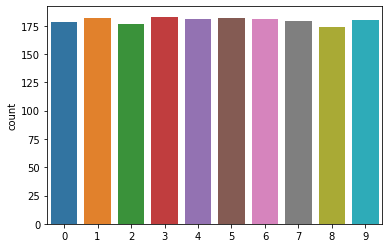

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

sns.countplot(digits.target)

In [4]:
X = digits.data
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1347, 64), (1347,), (450, 64), (450,))

In [7]:
np.unique(y)

array([False,  True])

c:\Users\posky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\posky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'test')

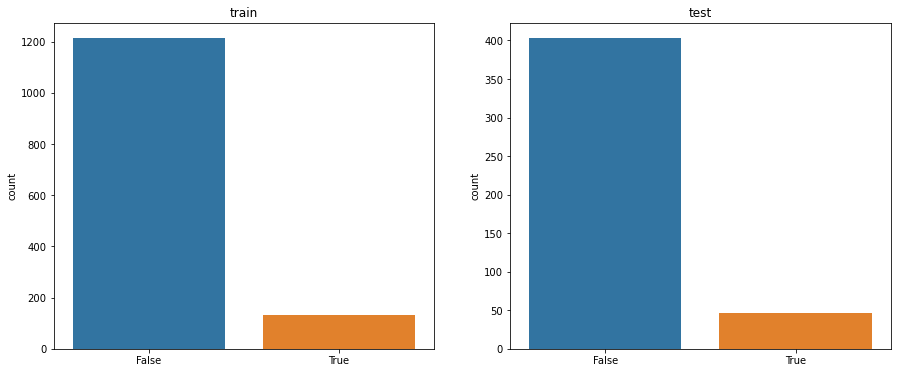

In [8]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title('train')

plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('test')

In [12]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('pred:', np.unique(pred))
print('train acc:', model.score(X_train, y_train))
print('test acc:', model.score(X_test, y_test))

pred: [False]
train acc: 0.9012620638455828
test acc: 0.8955555555555555


In [13]:
model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('pred:', np.unique(pred))
print('train acc:', model.score(X_train, y_train))
print('test acc:', model.score(X_test, y_test))

pred: [False  True]
train acc: 0.8292501855976243
test acc: 0.78


In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print('pred:', np.unique(pred))
print('train acc:', model.score(X_train, y_train))
print('test acc:', model.score(X_test, y_test))

print('cross validation: ', cross_val_score(model, X, y))

pred: [False  True]
train acc: 0.9383815887156645
test acc: 0.9177777777777778
cross validation:  [0.93611111 0.9        0.94707521 0.91364903 0.91364903]


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print('pred:', np.unique(pred))
print('train acc:', model.score(X_train, y_train))
print('test acc:', model.score(X_test, y_test))

print('cross validation: ', cross_val_score(model, X, y))

pred: [False  True]
train acc: 0.9977728285077951
test acc: 0.9844444444444445
cross validation:  [0.96111111 0.94444444 0.98050139 0.98885794 0.9637883 ]


c:\Users\posky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\posky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [19]:
import mglearn

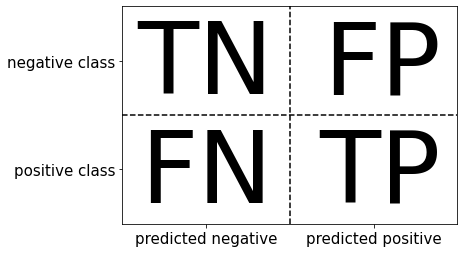

In [20]:
mglearn.plots.plot_binary_confusion_matrix()

In [23]:
from sklearn.metrics import confusion_matrix

model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

matrix = confusion_matrix(y_test, pred)
print('confusion matrix:\n{}'.format(matrix))
score = (matrix[0][0] + matrix[1][1]) / matrix.sum()
score

confusion matrix:
[[402   1]
 [  6  41]]


c:\Users\posky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9844444444444445

* 정확도
    * 정확하게 예측 / 전체 예측 수
    * (TP + TN) / (TP + FP + FN + TN)
* 정밀도 (precision)
    * 예측을 양성(Positive)으로 한 것 전체 중에 잘 예측한 것
    * TP / (FP + TP)
* 민감도 (recall, 재현율)
    * 전체 실제 양성 데이터중에 얼마나 많은 샘플을 양성으로 잘 분류했나?
    * TP / (TP + FN)
* 특이도
    * 전체 실제 데이터의 음성 데이터중에 제대로 예측한 샘플
    * TN / (FP + TN)
* FPRate
    * 전체 실제 데이터의 음성 데이터중에 예측을 실패, 잘 분류하지 못한 것
    * FP / (FP + TN)

* F-score
    * F = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)
    * f1 점수

In [24]:
from sklearn.metrics import f1_score

In [26]:
model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('pred:', np.unique(pred))
print('train acc:', model.score(X_train, y_train))
print('test acc:', model.score(X_test, y_test))

print('F1-score:', f1_score(y_test, pred))

pred: [False]
train acc: 0.9012620638455828
test acc: 0.8955555555555555
F1-score: 0.0


In [28]:
model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('pred:', np.unique(pred))
print('train acc:', model.score(X_train, y_train))
print('test acc:', model.score(X_test, y_test))

print('F1-score:', f1_score(y_test, pred))

pred: [False  True]
train acc: 0.8106904231625836
test acc: 0.7977777777777778
F1-score: 0.09638554216867469


In [29]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print('pred:', np.unique(pred))
print('train acc:', model.score(X_train, y_train))
print('test acc:', model.score(X_test, y_test))

print('cross validation: ', cross_val_score(model, X, y))

print('F1-score:', f1_score(y_test, pred))

pred: [False  True]
train acc: 0.9383815887156645
test acc: 0.9177777777777778
cross validation:  [0.93611111 0.9        0.94707521 0.91364903 0.91364903]
F1-score: 0.5542168674698795


In [34]:
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print('pred:', np.unique(pred))
print('train acc:', model.score(X_train, y_train))
print('test acc:', model.score(X_test, y_test))

cvs = cross_val_score(model, X, y, scoring='f1')
print('cross validation: ', cvs)
print(cvs.mean())

print('F1-score:', f1_score(y_test, pred))

pred: [False  True]
train acc: 0.9977728285077951
test acc: 0.9844444444444445
cross validation:  [0.76666667 0.70588235 0.90666667 0.94444444 0.82666667]
0.8300653594771241
F1-score: 0.9213483146067415


c:\Users\posky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\posky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_